In [1]:
import pandas as pd
import numpy as np
from pickle import load
from pickle import dump
pd.set_option("max_columns", None)
pd.set_option('max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate, cross_val_predict, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer, f1_score, precision_score, recall_score

In [2]:
df = load(open('../PICKLES/race_poverty_results.pkl', 'rb'))


In [3]:
df = df.drop(['County_x', 'id', 'State_x', 'County_y', 'State_y', 'county'], axis = 1)

In [4]:
state_dummies = pd.get_dummies(df['state'], drop_first = True)
central_outlying = pd.get_dummies(df['central_outlying'], drop_first = True)

In [5]:
df = df.drop(['state', 'central_outlying'], axis = 1)

In [6]:
df = pd.concat([df, state_dummies, central_outlying], axis = 1)

In [7]:
df.Target = df.Target.map({'Trump': 0, 'Clinton': 1})

In [8]:
X = df.drop(['Target'], axis = 1)
y = df.Target

In [9]:
f1_scores = make_scorer(f1_score)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [11]:
scaler = StandardScaler(with_mean = False, with_std = False)

In [12]:
X_train_sc = scaler.fit_transform(X_train)

In [13]:
X_test_sc = scaler.transform(X_test)

In [14]:
oversample = SMOTE()

In [15]:
X_train_sc_smote, y_train_smote = oversample.fit_resample(X_train_sc, y_train)

In [16]:
model = LinearSVC(class_weight = 'balanced')

In [17]:
model.fit(X_train_sc_smote, y_train_smote)

C:\Users\angie\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(class_weight='balanced')

In [18]:
yhat = model.predict(X_test)

In [19]:
f1 = f1_score(y_test, yhat)

In [20]:
f1

0.8955223880597014

In [21]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [23]:
model.coef_

array([[ 2.28286212e-04, -2.25030165e-05, -3.03202424e-04,
        -5.16186562e-05, -1.23911021e-04,  2.38538219e-04,
         6.31276454e-04, -4.13585588e-04,  2.50789229e-04,
         5.74318929e-04,  5.92709413e-04, -2.03063952e-03,
         1.16693751e-04,  3.20465504e-05,  2.92177015e-04,
         3.81305607e-04, -1.58002093e-03,  1.77443299e-06,
         6.71993927e-06, -1.74835508e-07, -9.52055616e-08,
         3.83646477e-06,  5.87510469e-06, -1.08176857e-07,
        -8.46952790e-08,  0.00000000e+00, -3.66327716e-07,
         2.25830457e-06, -4.03896783e-28,  2.00614713e-07,
        -1.40270980e-06, -2.58825753e-07, -3.88844540e-06,
        -1.39318272e-07, -3.83858257e-07,  3.79978243e-06,
         4.78904435e-07, -1.02257107e-07,  1.13627432e-07,
        -1.18887716e-06,  1.24608927e-06, -9.53526716e-08,
        -2.57346517e-07, -4.07316420e-06, -4.84296395e-06,
        -5.50619175e-07, -1.69580737e-07, -7.02798225e-11,
        -1.24012403e-06, -7.99018307e-07, -6.65395273e-0

In [24]:
X.columns

Index(['total_pop', 'total_pop_one_race', 'pop_white', 'pop_african_american',
       'pop_native', 'pop_asian', 'pop_islander', 'pop_other',
       'total_pop_two_races', '2016_total_votes', 'Obama', 'Romney',
       '2012_total_votes', '2010_land_area', 'Density', 'poverty_total',
       'poverty_under_18', 'median_household_income', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
     

<AxesSubplot:>

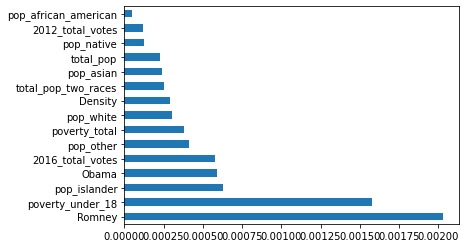

In [31]:
pd.Series(abs(model.coef_[0]), index=X.columns).nlargest(15).plot(kind='barh')